In [70]:
import pandas as pd 

df = pd.read_csv('G:/Mi unidad/VSC/DSA_DATACAMP/proyectos/credit_card_fraude/data/raw/fraud.csv')
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   trans_date_trans_time      object 
 1   cc_num                     int64  
 2   merchant                   object 
 3   category                   object 
 4   amt                        float64
 5   first                      object 
 6   last                       object 
 7   gender                     object 
 8   street                     object 
 9   city                       object 
 10  state                      object 
 11  zip                        int64  
 12  lat                        float64
 13  long                       float64
 14  city_pop                   int64  
 15  job                        object 
 16  dob                        object 
 17  trans_num                  object 
 18  unix_time                  int64  
 19  merch_lat                  float64
 20  me

# Validación de cc de tarjetas de créditos en estados unidos 


In [71]:
def card_type(cc_num):
    if (len(cc_num) == 16 or len (cc_num) == 13 or len (cc_num) == 19) and cc_num.startswith('4'):
        return 'Visa'
    elif len(cc_num) == 16 and (cc_num.startswith('5155') or cc_num.startswith('2221') or cc_num.startswith('2720')):
        return 'MasterCard'
    elif len(cc_num) == 15 and (cc_num.startswith('34') or cc_num.startswith('37')):
        return 'American Express'
    elif len(cc_num) == 16 and (cc_num.startswith('6011') or cc_num.startswith('622') or cc_num.startswith('64') or cc_num.startswith('65')):
        return 'Discover'
    elif (len(cc_num) == 16 or len(cc_num) == 14) and (cc_num.startswith('300') or cc_num.startswith('305') or cc_num.startswith('36') or cc_num.startswith('38') or cc_num.startswith('39')):
        return 'Dinner Club'
    else :
        return 'Unknown'

In [72]:
# apply the function to the cc_num column
df['card_type'] = df['cc_num'].astype('str').apply(card_type)
df['card_type'].value_counts()

card_type
Unknown             827809
Visa                598643
American Express    177089
Discover            150084
Dinner Club          88544
MasterCard           10225
Name: count, dtype: int64

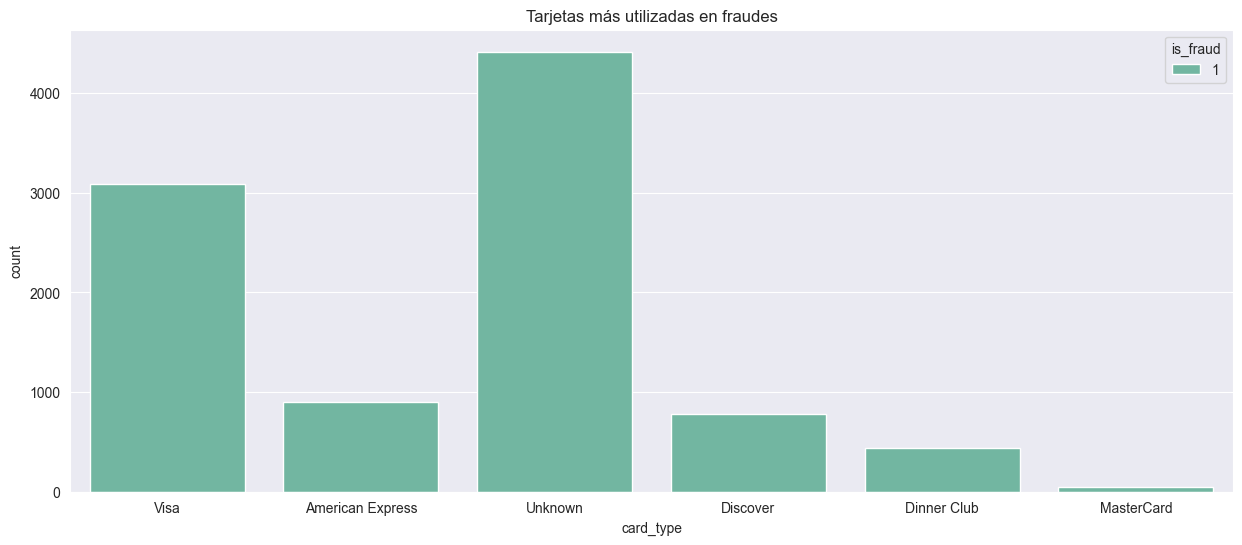

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.countplot(data=df[df['is_fraud'] == 1], x='card_type', hue='is_fraud', palette='Set2')
plt.title('Tarjetas más utilizadas en fraudes')
plt.show()

# Distancia de la ubicación donde fue realizada la compra al negocio

In [74]:
# Calcular la distancia entre las coordenadas del negocio y del cliente

from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Diferencias
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))

    # Distancia
    distance = R * c
    return distance

In [75]:
df['distancia_cliente_negocio'] = df.loc[:,['lat', 'long', 'merch_lat', 'merch_long']].apply(lambda x: haversine(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)
df['distancia_cliente_negocio'] 

0           78.597568
1           30.212176
2          108.206083
3           95.673231
4           77.556744
              ...    
1852389     77.026148
1852390    100.074420
1852391     80.759302
1852392     52.933240
1852393     72.438289
Name: distancia_cliente_negocio, Length: 1852394, dtype: float64

# Edad de los clientes

In [ ]:
# Fecha de nacimiento
df['dob'] 

0         1988-03-09
1         1978-06-21
2         1962-01-19
3         1967-01-12
4         1986-03-28
             ...    
1852389   1966-02-13
1852390   1999-12-27
1852391   1981-11-29
1852392   1965-12-15
1852393   1993-05-10
Name: dob, Length: 1852394, dtype: datetime64[ns]

In [85]:
# Vamos a crear una variable edad, calculando en base la fecha de la transacción y la fecha de nacimiento.

df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')
# Conversión con fecha y hora
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')


delta = df['trans_date_trans_time'] - df['dob']

df['edad'] = delta.dt.days // 365 # Dividimos entre 365 para obtener la edad en años
df['edad']

0          30
1          40
2          56
3          52
4          32
           ..
1852389    54
1852390    21
1852391    39
1852392    55
1852393    27
Name: edad, Length: 1852394, dtype: int64

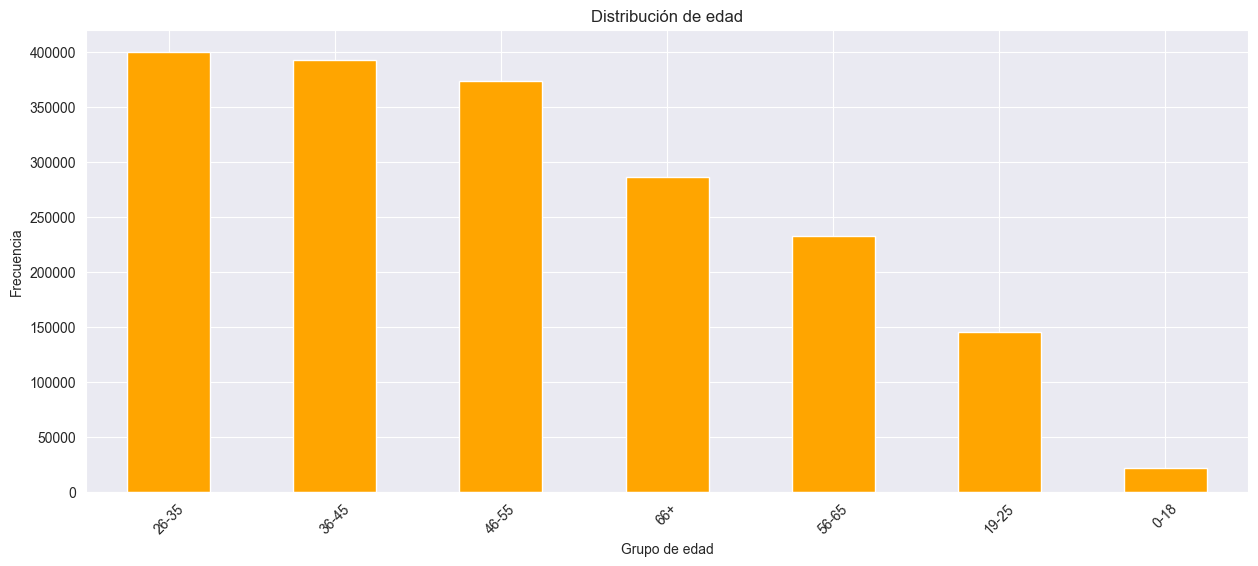

In [89]:
# Crearemos grupos de edades 

plt.figure(figsize=(15, 6))

bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False) 
df['grupo_edad'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribución de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()
